1. Opis problemu
Zbiór danych to Adult https://archive.ics.uci.edu/dataset/2/adult
Zawiera on informacje o danych osób które zarabiają poniżej lub powyżej 50K
Celem jest klasyfikacja określająca czy dana osoba zarabia powyżej 50K

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('ad.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,cative-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


2 Opis danych

In [3]:
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [4]:
#Sprawdzanie czy dane zawierają puste wartości
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
#Przejrzenie wartości workclass
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
#Sprawdzenie ilości '?'
data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
print('Dane liczbowe: ')
cont=[]
for i in data.columns:
  if data[i].dtype=='int64':
    cont.append(i)
    print(i,end=', ')
print('\n\nDane kategoryczne: ')
catg=[]
for i in data.columns:
  if data[i].dtype=='object':
    catg.append(i)
    print(i,end=',  ')

Dane liczbowe: 
age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, 

Dane kategoryczne: 
workclass,  education,  marital-status,  occupation,  relationship,  race,  sex,  native-country,  income,  

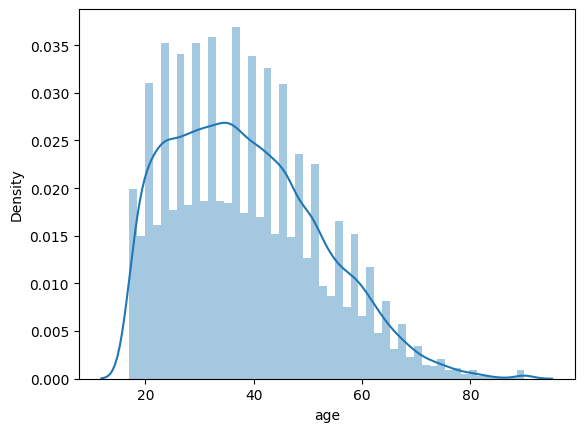

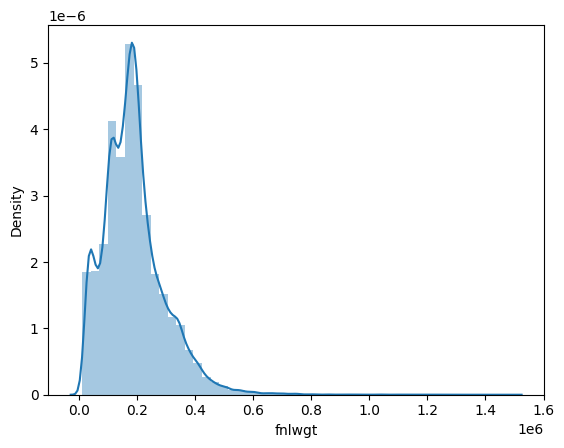

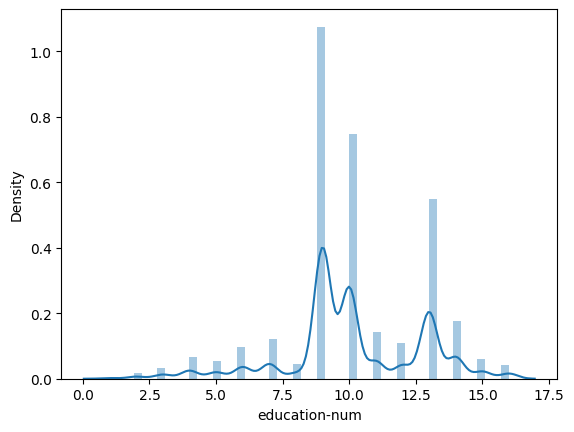

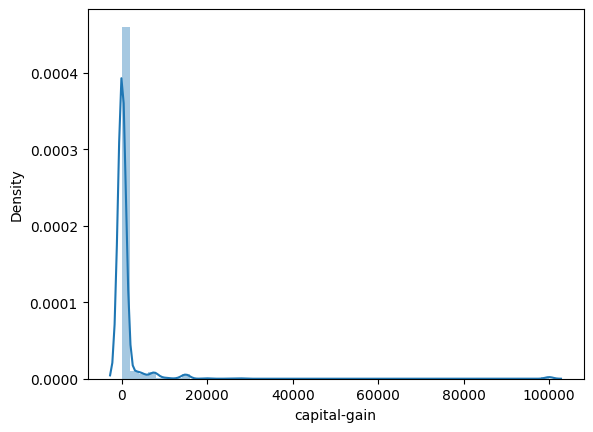

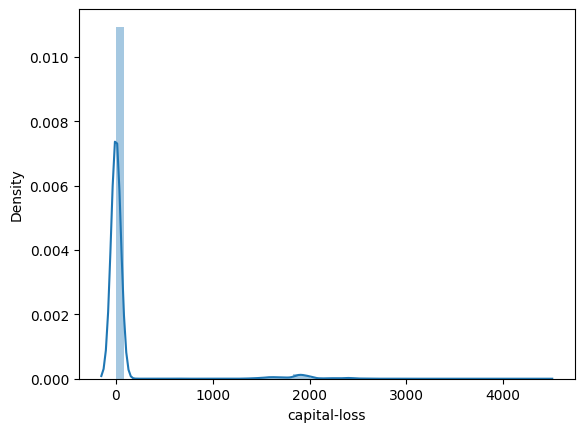

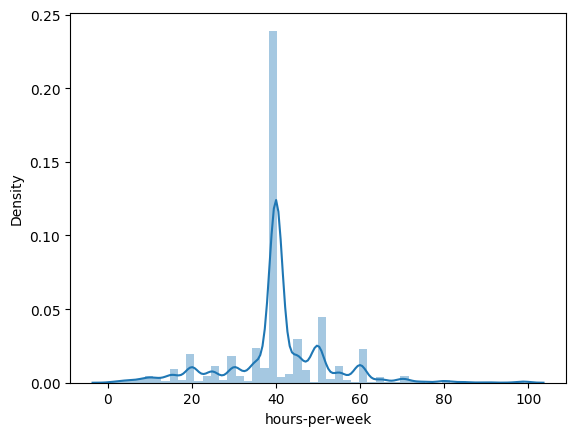

In [8]:
for i in cont:
  sns.distplot(data[i])
  plt.show()

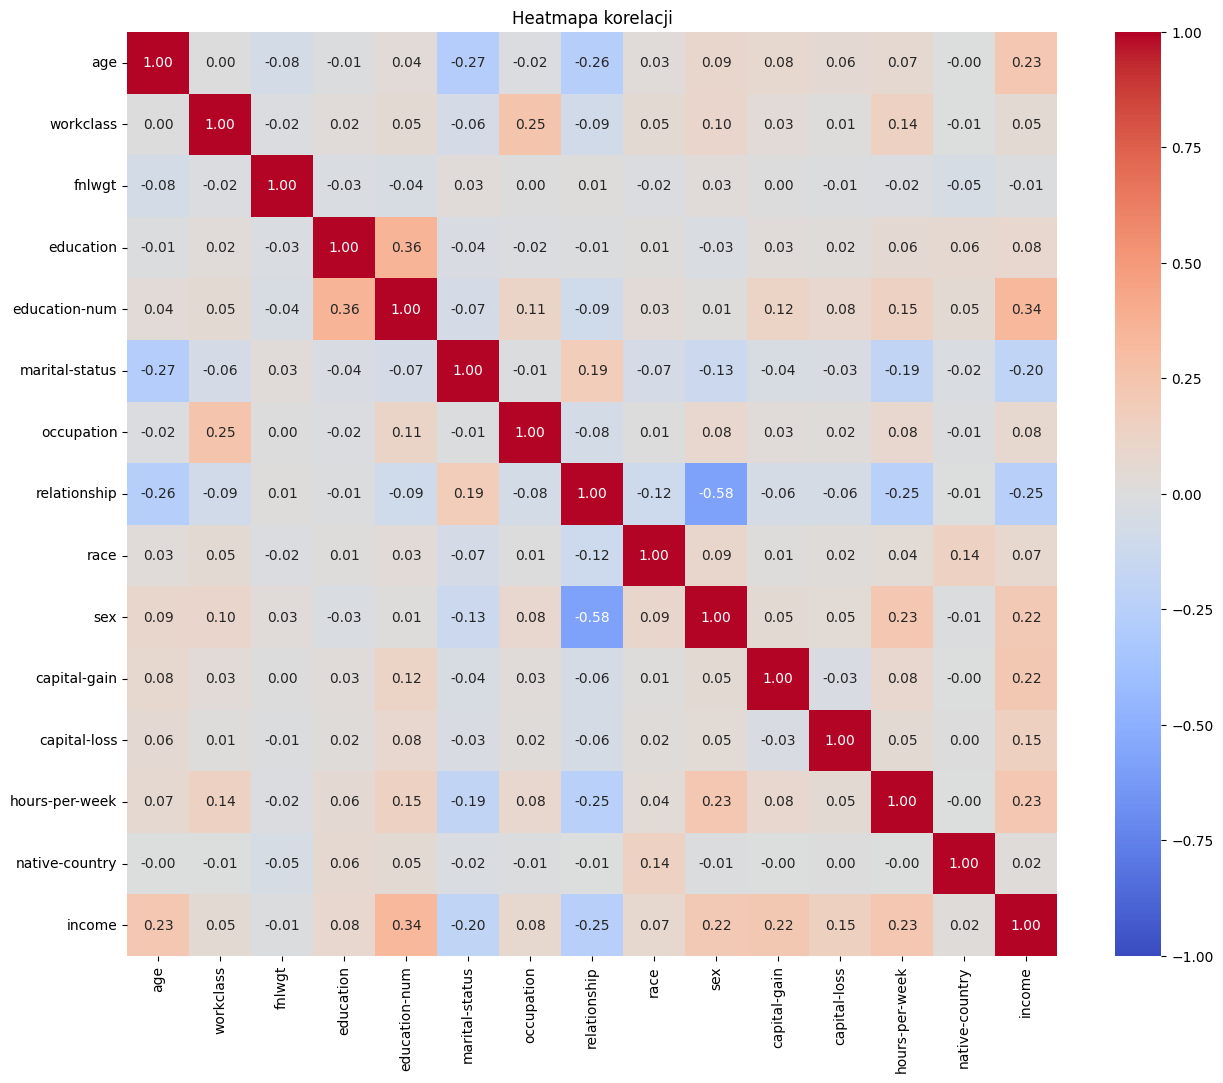

In [9]:
data_copy = data.copy()

label_encoder = LabelEncoder()
for col in catg:
    if data_copy[col].dtype == 'object':
        data_copy[col] = label_encoder.fit_transform(data_copy[col])

correlation_matrix = data_copy.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmapa korelacji")
plt.show()

In [10]:
#funkcja do porównania ile w danej kolumnie danych jest osob zarabiających powyżej i poniżej 50K
def comp(dt,i):
  plt.figure(figsize=(20,5))
  b=dt[dt['income'].str.strip()=='<=50K'][i].value_counts()
  a=dt[dt['income'].str.strip()=='>50K'][i].value_counts()
  plt.subplot(1,2,1)
  plt.title('<=50K')
  sns.barplot(b)
  plt.subplot(1,2,2)
  plt.title('>50K')
  sns.barplot(a)
  plt.show()

workclass :



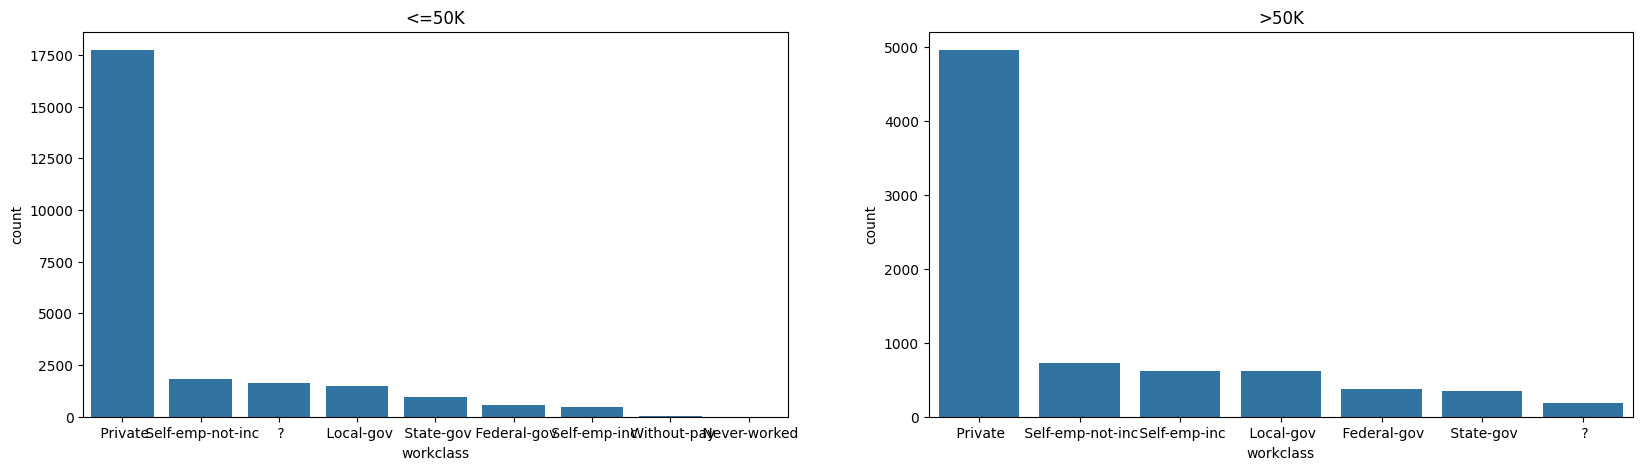

education :



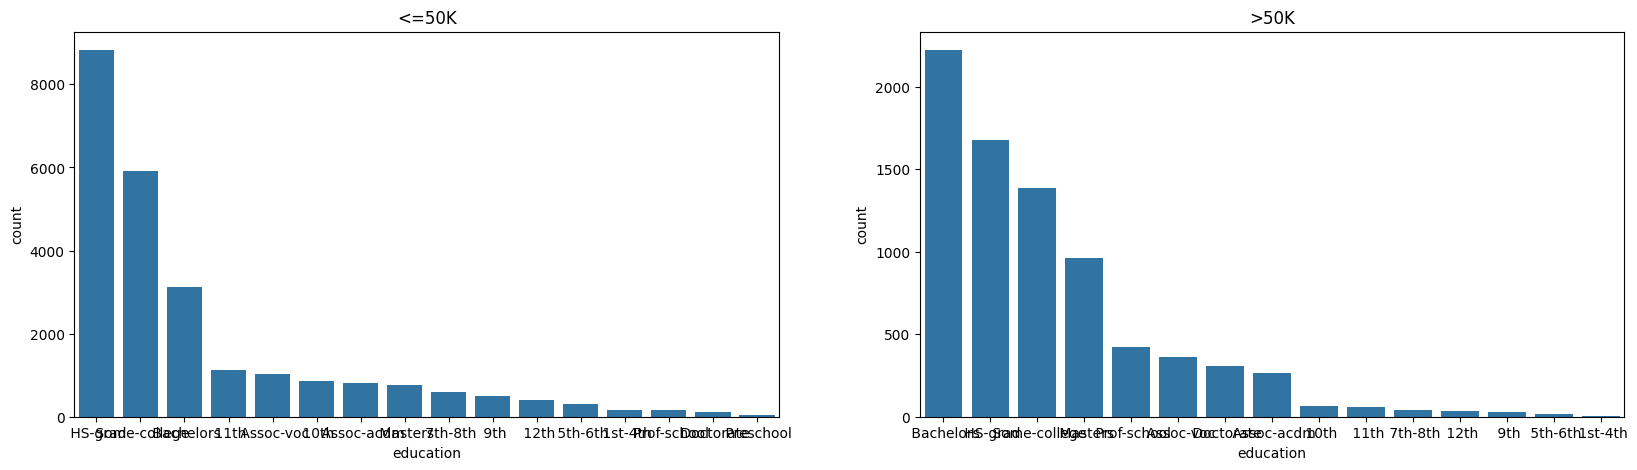

marital-status :



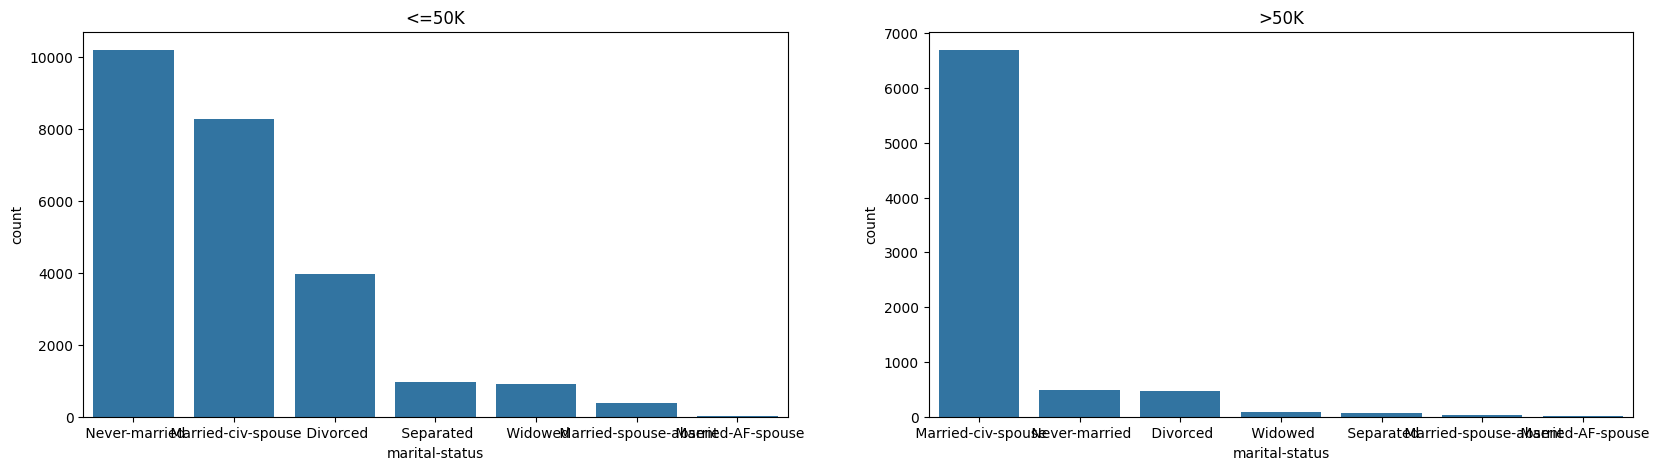

occupation :



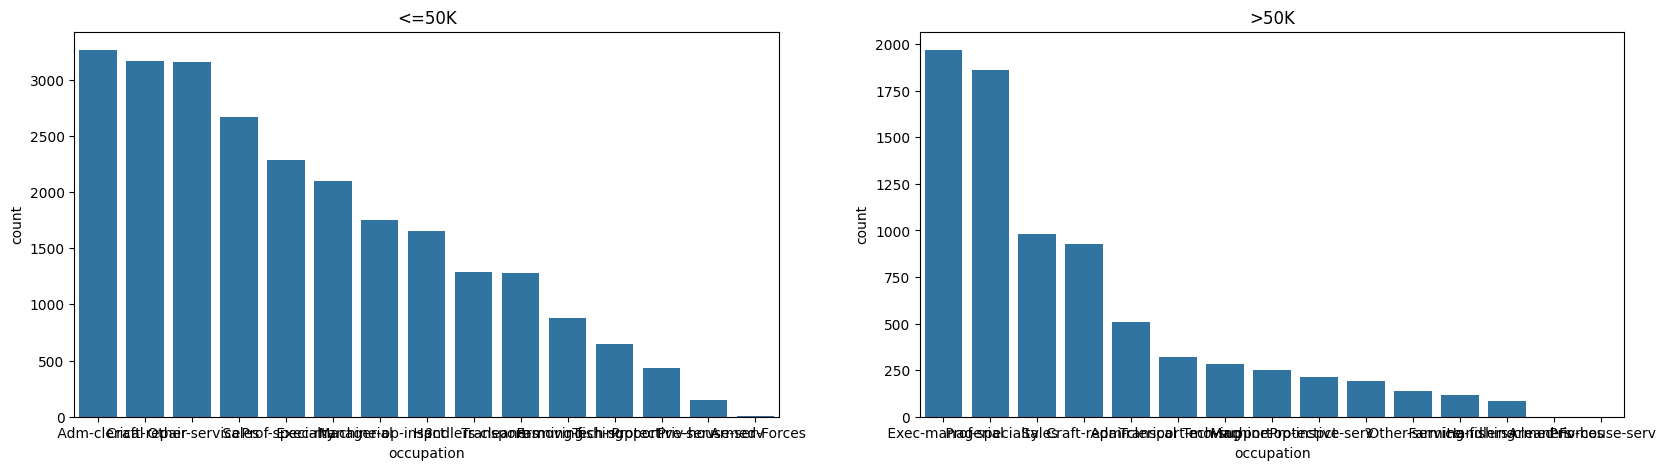

relationship :



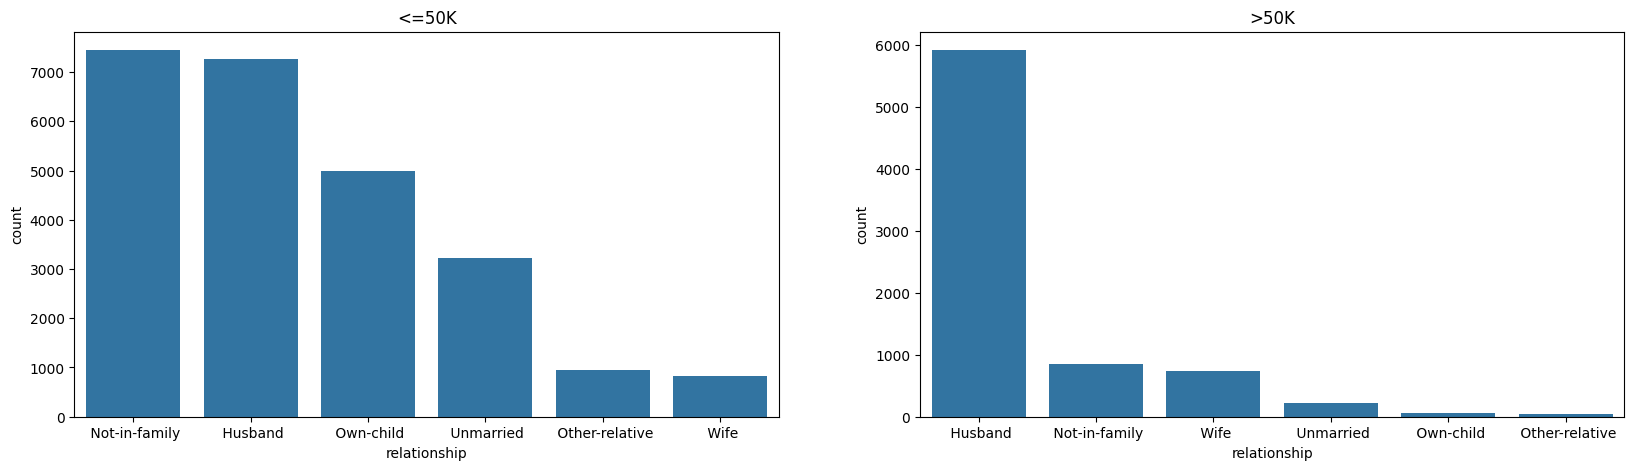

race :



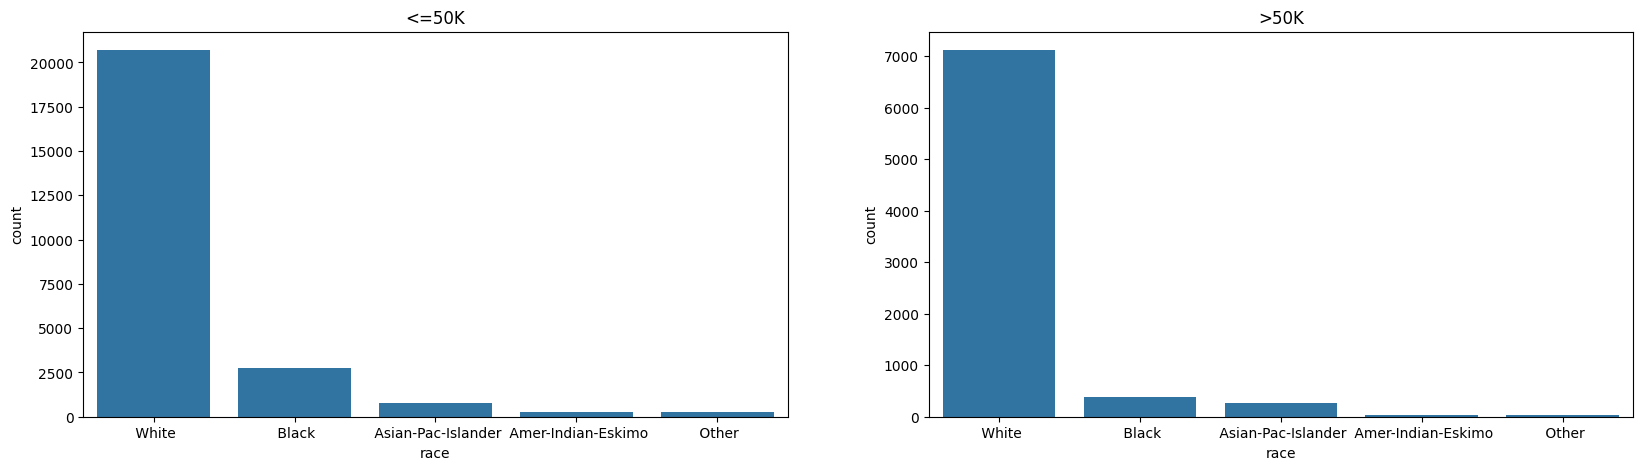

sex :



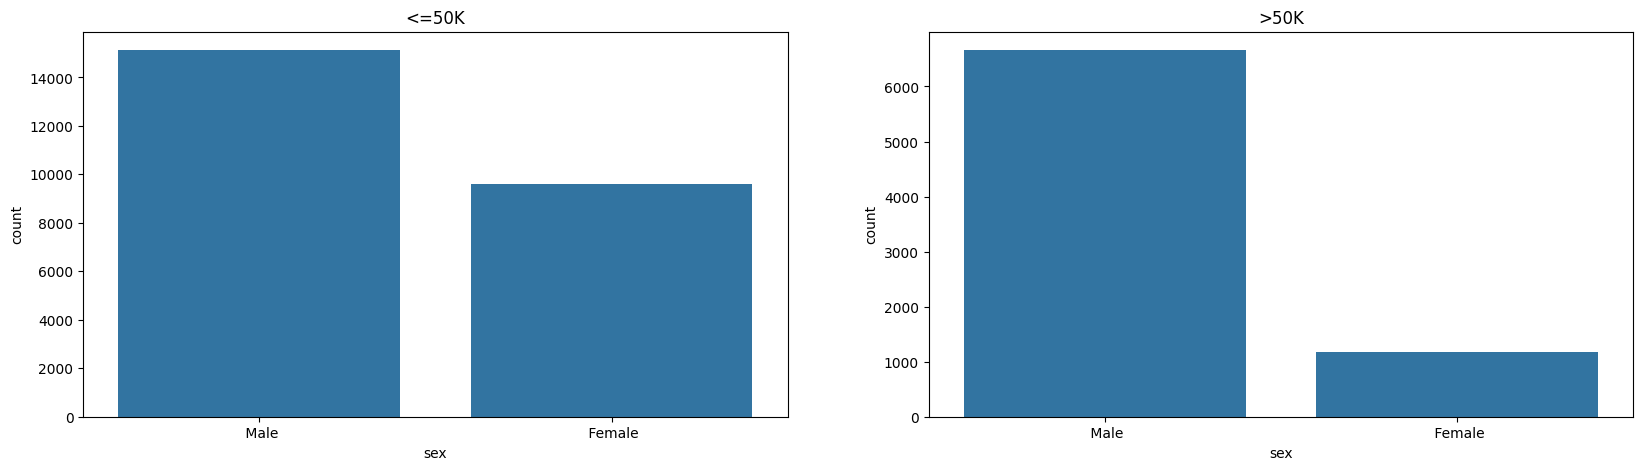

native-country :



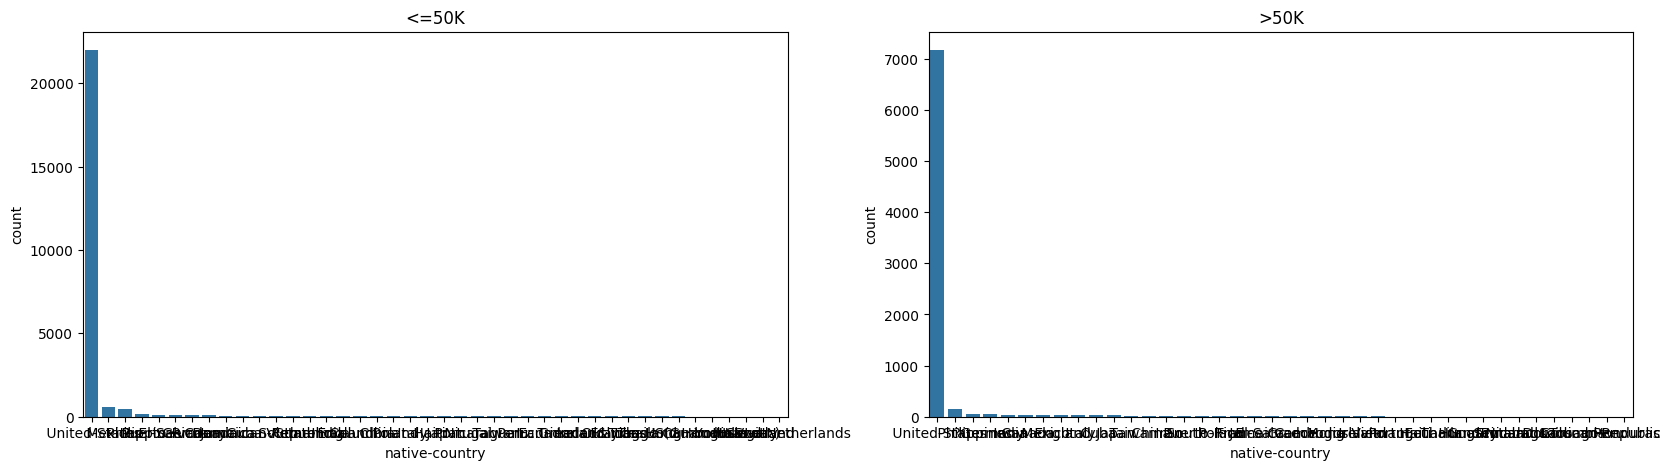

income :



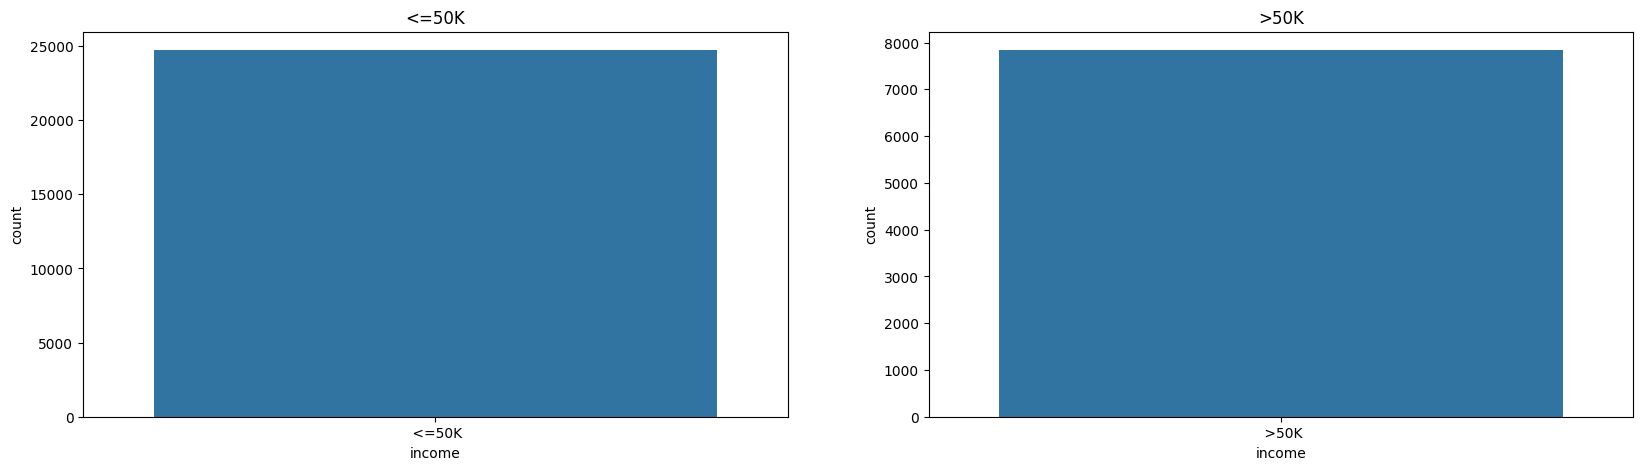

In [11]:
for i in catg:
  print(i,':\n')
  comp(data,i)

3. Przygotowanie danych

In [12]:
#Usuwanie '?'
#Ze względu na niewielką ilość danych brakujących oraz rodzaj danych których brakuje zmieniam '?' na np.nan
data=data.replace(' ?',np.nan)

In [13]:
data.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Normalizacja danych oraz wybór cech za pomocą metody chi2, dodatkowo wyrzucienie danych które mogą zaburzać wynik

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

final_data = data.copy()

#normalizacja danych liczbowych
final_data[cont] = MinMaxScaler().fit_transform(final_data[cont])
final_data_norm = final_data.copy()

#transformacja umożliwiająca użycie danych kategorycznych w modelach
label_encoder = LabelEncoder()
for col in catg:
    if final_data_norm[col].dtype == 'object':
        final_data_norm[col] = label_encoder.fit_transform(final_data_norm[col])

y = final_data_norm['income']
final_data_norm = final_data_norm.drop('income', axis=1)

#wyrzuceinie capital-loss i capital-gain ze względu na to że mogą zaburzać wyniki ponieważ moga pokazywać "przyszłość"
final_data_norm = final_data_norm.drop(['capital-gain', 'capital-loss'], axis=1)

#wyrzucenie education ze względu na powtarzające sie dane z education-num,education-num to liczba okreslajaca długość nauki.
final_data_norm = final_data_norm.drop('education', axis=1)

chi2_selector_3 = SelectKBest(chi2, k=3)
chi2_selected_3 = chi2_selector_3.fit_transform(final_data_norm, y)
selected_features_3 = final_data_norm.columns[chi2_selector_3.get_support()]

chi2_selector_5 = SelectKBest(chi2, k=5)
chi2_selected_5 = chi2_selector_5.fit_transform(final_data_norm, y)
selected_features_5 = final_data_norm.columns[chi2_selector_5.get_support()]

chi2_selector_10 = SelectKBest(chi2, k=10)
chi2_selected_10 = chi2_selector_10.fit_transform(final_data_norm, y)
selected_features_10 = final_data_norm.columns[chi2_selector_10.get_support()]

chi2_selector_11 = SelectKBest(chi2, k=11)
chi2_selected_11 = chi2_selector_11.fit_transform(final_data_norm, y)
selected_features_11 = final_data_norm.columns[chi2_selector_11.get_support()]

print("Wybrane cechy:")
print(selected_features_5)

Wybrane cechy:
Index(['age', 'education-num', 'marital-status', 'relationship', 'sex'], dtype='object')


4. Tworzenie modelu i ocena (algorytmów) oraz wybór ilości cech

Las losowy posłuży do testu ilości cech

In [15]:
X_train_10, X_test_10, y_train, y_test = train_test_split(final_data_norm[selected_features_10], y, test_size=0.30, random_state=0)
model=RandomForestClassifier()
model.fit(X_train_10,y_train)
y_pred=model.predict(X_test_10)

In [16]:
confusion_matrix(y_test,y_pred)

array([[6680,  727],
       [1017, 1345]], dtype=int64)

In [17]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7407
        >50K       0.65      0.57      0.61      2362

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769



In [18]:
X_train_5, X_test_5, y_train, y_test = train_test_split(final_data_norm[selected_features_5], y, test_size=0.30, random_state=0)
model=RandomForestClassifier()
model.fit(X_train_5,y_train)
y_pred=model.predict(X_test_5)

In [19]:
confusion_matrix(y_test,y_pred)

array([[6674,  733],
       [1139, 1223]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.88      7407
        >50K       0.63      0.52      0.57      2362

    accuracy                           0.81      9769
   macro avg       0.74      0.71      0.72      9769
weighted avg       0.80      0.81      0.80      9769



In [21]:
X_train_11, X_test_11, y_train, y_test = train_test_split(final_data_norm[selected_features_11], y, test_size=0.30, random_state=0)
model=RandomForestClassifier()
model.fit(X_train_11,y_train)
y_pred=model.predict(X_test_11)

In [22]:
confusion_matrix(y_test,y_pred)

array([[6745,  662],
       [1031, 1331]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7407
        >50K       0.67      0.56      0.61      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [24]:
X_train_3, X_test_3, y_train, y_test = train_test_split(final_data_norm[selected_features_3], y, test_size=0.30, random_state=0)
model=RandomForestClassifier()
model.fit(X_train_3,y_train)
y_pred=model.predict(X_test_3)

In [25]:
confusion_matrix(y_test,y_pred)

array([[7405,    2],
       [2361,    1]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      7407
        >50K       0.33      0.00      0.00      2362

    accuracy                           0.76      9769
   macro avg       0.55      0.50      0.43      9769
weighted avg       0.66      0.76      0.65      9769



Patrząc na wyniki wybór 5 cech wydaje sie najlepszy ze względu na to że z 12 cech wybierane jest 5 więc zmniejsza to znacznie ilośc danych oraz 5 cech ma porównywalne wyniki z 10 cechami i spadek z 0.83 acc do 0.81 acc w porównaniu 12 cech z 5.

Las losowy

In [27]:
X_train_5, X_test_5, y_train, y_test = train_test_split(final_data_norm[selected_features_5], y, test_size=0.30, random_state=0)
model=RandomForestClassifier()
model.fit(X_train_5,y_train)
y_pred=model.predict(X_test_5)

In [28]:
confusion_matrix(y_test,y_pred)

array([[6670,  737],
       [1146, 1216]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.88      7407
        >50K       0.62      0.51      0.56      2362

    accuracy                           0.81      9769
   macro avg       0.74      0.71      0.72      9769
weighted avg       0.80      0.81      0.80      9769



Naiwny klasyfikator Bayes'a

In [30]:
from sklearn.naive_bayes import GaussianNB
X_train_5, X_test_5, y_train, y_test = train_test_split(final_data_norm[selected_features_5], y, test_size=0.30, random_state=0)
model = GaussianNB()
model.fit(X_train_5, y_train)
y_pred = model.predict(X_test_5)

In [31]:
confusion_matrix(y_test,y_pred)

array([[6007, 1400],
       [ 701, 1661]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.90      0.81      0.85      7407
        >50K       0.54      0.70      0.61      2362

    accuracy                           0.78      9769
   macro avg       0.72      0.76      0.73      9769
weighted avg       0.81      0.78      0.79      9769



Algorytm wzmacniania gradientowego (XGB)

In [33]:
from xgboost import XGBClassifier
X_train_5, X_test_5, y_train, y_test = train_test_split(final_data_norm[selected_features_5], y, test_size=0.30, random_state=0)
model = XGBClassifier()
model.fit(X_train_5, y_train)
y_pred = model.predict(X_test_5)

In [34]:
confusion_matrix(y_test,y_pred)

array([[6804,  603],
       [1098, 1264]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      7407
        >50K       0.68      0.54      0.60      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.74      9769
weighted avg       0.82      0.83      0.82      9769



Prównując wyniki 3 klasyfikatorów XGB wypada najlepiej, ale naiwny klasyfikator Bayes'a najlepiej określił kto nie zarabia 50K , mimo to uzyskał on najgorszą precyzje.

5. Podsumowanie
Najbardziej efektywną metodą okazał się XGBClassifier. Modele miały problem z wskazaniem kto zarabia powyżej 50K, jednocześnie dobrze sobie radząc z wskazaniem kto nie zarabia powyżej 50K np w XGB <=50K 86% precision a >50K 67% precision. Uzyskane wyniki oscylowały w okolicach 80% accuracy, więc wyniki uważam za zadowalające. Największy wpływ na wyniki miał wiek oraz education-num który jest równoznaczny z ilością czasu nauki.